In [1]:
import pandas as pd
import numpy as np



from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

d:\Softwares\Installed\Anaconda\envs\isr_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1").cuda()

# Load a traditional Sentiment Analysis model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path,
                          tokenizer=sentiment_model_path)

d:\Softwares\Installed\Anaconda\envs\isr_project\Lib\site-packages\transformers\convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [45]:
inputs.to("cuda")

{'input_ids': tensor([[    1,     1,   279,  4340,   284,   431,  1800,   901,   262,   710,
           265,   291,  1905,   412,   278, 62894,     2,  1800,     2,     2]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

In [41]:
dir(inputs)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_encodings',
 '_n_sequences',
 'char_to_token',
 'char_to_word',
 'clear',
 'convert_to_tensors',
 'copy',
 'data',
 'encodings',
 'fromkeys',
 'get',
 'is_fast',
 'items',
 'keys',
 'n_sequences',
 'pop',
 'popitem',
 'sequence_ids',
 'setdefault',
 'to',
 'token_to_chars',
 'token_to_sequence',
 'token_to_word',
 'tok

In [49]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1935, -2.0749,  3.7412]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [48]:
sentence = "The shirt was really comfortable however the price of this item made it untouchable"
print(f"Sentence: {sentence}")
print()

# ABSA of "food"
aspect = "comfortable"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt").to("cuda")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.cpu().detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'food' is:
# Label negative: 0.0009989114478230476s
# Label neutral: 0.001823813421651721
# Label positive: 0.997177243232727

# ABSA of "service"
aspect = "shirt"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt").to("cuda")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'service' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

# Overall sentiment of the sentence
sentiment = sentiment_model([sentence])[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")
# Overall sentiment: Negative with score 0.7706006765365601

Sentence: The shirt was really comfortable however the price of this item made it untouchable

Sentiment of aspect 'comfortable' is:
Label negative: 0.3936208188533783
Label neutral: 0.08943913131952286
Label positive: 0.5169400572776794

Sentiment of aspect 'shirt' is:
Label negative: 0.0026312118861824274
Label neutral: 0.002962348982691765
Label positive: 0.9944064617156982

Overall sentiment: negative with score 0.5427278280258179


In [51]:
review_data = pd.read_csv('../Project_Data/Review_data.csv', index_col=0)
review_data.sample(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
95795,5.0,NaN,True,"01 29, 2014",A2LUD665NACE4F,B001LRJX4U,Lovetoshop,I bought these for my husband who is a metal c...,Excellent quality,1390953600,"{'Size:': ' Medium', 'Color:': ' Dark Navy'}",NaN
141332,5.0,5.0,True,"09 15, 2015",AS1MJFB1CKAKE,B005934WR0,Brit,Our daughter has wore these boots until she ha...,"Worn Rain, Snow, and Shine",1442275200,"{'Size:': ' 7 M US Toddler', 'Color:': ' Wings'}",['https://images-na.ssl-images-amazon.com/imag...
34909,5.0,NaN,True,"01 9, 2016",A3JEXQ0P7K8P5T,B000XBM1L2,Jennifer P.,Bought them for my boyfriend and he didn't car...,I love the way they look but ended up giving t...,1452297600,"{'Size:': ' 10.5 D(M) US', 'Color:': ' Black'}",NaN
319066,5.0,NaN,True,"09 7, 2016",A2FR7O6RY9PLY1,B01G87QKMA,Pig Scum,Made my hubbies eyeballs poke out on their ste...,Five Stars,1473206400,"{'Size:': ' XX-Large', 'Color:': ' Floral'}",NaN
30919,4.0,NaN,True,"10 13, 2017",A27BHHRBAPQ9NZ,B000XBM1L2,Maria Roberts,Very comfortable and durable. Material does st...,Four Stars,1507852800,"{'Size:': ' 10 B(M) US', 'Color:': ' Black Mor...",NaN


In [54]:
aspect = "price"

reviews = review_data['reviewText'].sample(10).tolist()
for review in reviews:
  inputs = absa_tokenizer(f"[CLS] {review} [SEP] {aspect} [SEP]", return_tensors="pt").to('cuda')
  outputs = absa_model(**inputs)
  probs = F.softmax(outputs.logits, dim=1)
  probs = probs.cpu().detach().numpy()[0]
  print("Review : ", review)
  print(f"Sentiment of aspect '{aspect}' is:")
  for prob, label in zip(probs, ["negative", "neutral", "positive"]):
    print(f"Label {label}: {prob}")
  print()
  sentiment = sentiment_model([review])[0]
  print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")

Review :  Good seller, good product.
Sentiment of aspect 'price' is:
Label negative: 0.004383445251733065
Label neutral: 0.018631240352988243
Label positive: 0.9769853353500366

Overall sentiment: positive with score 0.8653029203414917
Review :  made well.
Sentiment of aspect 'price' is:
Label negative: 0.0025922670029103756
Label neutral: 0.0130251944065094
Label positive: 0.9843824505805969

Overall sentiment: positive with score 0.7556275725364685
Review :  They should say if your head is bigger than 7" this product is a tight fit! Great product works well but a bit tight!
Sentiment of aspect 'price' is:
Label negative: 0.9587574601173401
Label neutral: 0.013137195259332657
Label positive: 0.028105447068810463

Overall sentiment: positive with score 0.7290250062942505
Review :  half size might have been good
Sentiment of aspect 'price' is:
Label negative: 0.4579278528690338
Label neutral: 0.3043316602706909
Label positive: 0.23774059116840363

Overall sentiment: neutral with score 0

In [84]:
# def sentiment_analysis(reviews, aspect):
reviews = mini_review_df['reviewText'].to_list()
aspect = 'cost'
# input_list = []
# prob_list = []
for sentence in tqdm(reviews):
  inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt").to("cuda")
  # input_list.append(inputs)
  outputs = absa_model(**inputs)
# outputs = absa_model(torch.Tensor(input_list))
  
# probs = F.softmax(outputs.logits, dim=1)
# probs = probs.cpu().detach().numpy()[0]
# prob_list.append(probs)
  # return prob_list

  1%|▏         | 1301/98988 [00:56<1:11:02, 22.92it/s]


KeyboardInterrupt: 

In [91]:
torch.cuda.get_device_name(1)

AssertionError: Invalid device id

In [65]:
input_list[0]

{'input_ids': tensor([[    1,     1,   273,   590,   280,   297,   409,   264,   794,   360,
           419,  1794,   270,   266,  1948, 11401,   261,   304,   273,   431,
           849,   266,   397,   714,   263,   262,  1937,  5172,   272,   260,
           471,   273, 60999,   321,   262,  6737,   270,   311,   263,   306,
           332,   423,   300,   325,  4662, 25880,   324,   343,   280,   268,
           363,  8783, 20547,   263,   278,   327,  9253, 18529,   271, 70032,
           260,   273,  3233,   266,   467,  1948, 11401,   292, 10328,   263,
           291,   269,   293,   659,   312,  1237,   265,   262,   375,   260,
           279, 10328,   311,  4511,   312, 67672,   268,   267,   324,   400,
           278,   412,   272,  8496, 67672, 11953,   764,   262, 11401,   683,
           272,   280,   268,  3979,   267,   731,  1941,   271, 12255,   341,
         75548,   341,   263,   306,   280,   368,  2902,   264,   282,   262,
           454, 11401,   884,   324,  

In [66]:
len(reviews)

344920

In [69]:
asins = review_data['asin'].unique()
per_asin_reviews = 30

df_list = []

for asin in tqdm(asins):
    mini_df = review_data[review_data['asin'] == asin]
    if mini_df.shape[0] < per_asin_reviews:
        df_list.append(mini_df.copy())
    else:
        df_list.append(mini_df.sample(per_asin_reviews).copy())
        
mini_review_df = pd.concat(df_list)
mini_review_df.to_csv('../Project_Data/MiniReview.csv')

100%|██████████| 5543/5543 [01:43<00:00, 53.42it/s]


In [74]:
mini_review_df.to_csv('../Project_Data/MiniReview.csv')

In [73]:
review_data.shape

(344920, 12)

In [61]:
from tqdm import tqdm
results = sentiment_analysis(review_data['reviewText'].to_list(), aspect='cost')

  0%|          | 1651/344920 [01:09<4:00:15, 23.81it/s]


KeyboardInterrupt: 

In [9]:
categories = [eval(cat) for cat in metadata['category'].tolist()]

In [17]:
# cat_set = set()
list_of_lists = categories
joined_catlist = [item for sublist in list_of_lists for item in sublist]

In [16]:
joined_catlist = [item for item in joined_catlist if len(item.split(' '))<3]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Clothing, Shoes & Jewelry'),
  Text(1, 0, 'Women'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Men'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Accessories'),
  Text(6, 0, 'Jewelry'),
  Text(7, 0, 'Novelty & More'),
  Text(8, 0, 'Imported'),
  Text(9, 0, 'Novelty'),
  Text(10, 0, 'Girls'),
  Text(11, 0, 'Shirts'),
  Text(12, 0, 'T-Shirts'),
  Text(13, 0, 'Athletic'),
  Text(14, 0, 'Sandals'),
  Text(15, 0, 'Boots'),
  Text(16, 0, 'Lingerie, Sleep & Lounge'),
  Text(17, 0, 'Costumes & Accessories'),
  Text(18, 0, 'Boys'),
  Text(19, 0, 'Watches')])

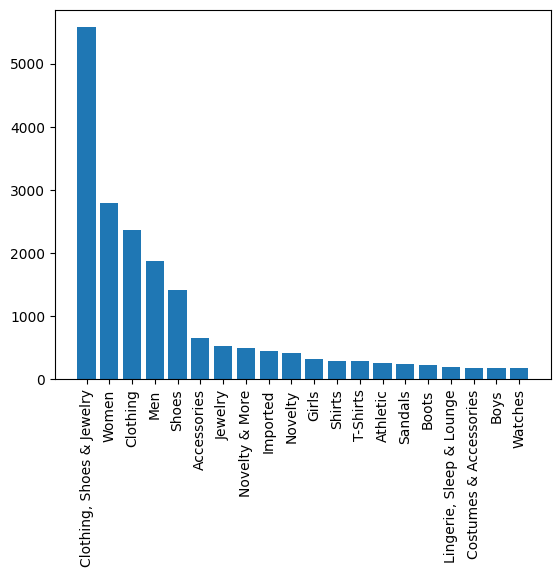

In [34]:
items = list(set(joined_catlist))
counts = [joined_catlist.count(item) for item in items]
ind = np.array(counts).argsort()[-20:][::-1]

import matplotlib.pyplot as plt
plt.bar([items[i] for i in ind], [counts[i] for i in ind])
def get_top_n_indices(array, top_n):
    return array.argsort()[-top_n:][::-1]
    plt.xticks(rotation=90)

In [93]:
def get_top_n_indices(array, top_n):
    return array.argsort()[-top_n:][::-1]


# number of features for seniment analysis
n_features = 6
# Number of total products (filtered)
n_products = 5567

feature_embedding_for_products = np.random.randn(n_products, n_features)
final_product_embeddings = feature_embedding_for_products.mean(axis=1)
top_item_ind = get_top_n_indices(final_product_embeddings, top_n=5)
return top_item_ind

(5567,)

In [102]:
lists = [[1,2,3,4],[4,5,6,7,1],[1,8,9,7,4]]
list(set.intersection(*map(set, lists)))

[1, 4]

In [99]:
top_ind = 

In [100]:
final_product_embeddings[top_ind]

array([1.57079852, 1.41198506, 1.39248131, 1.34813625, 1.3433735 ])